<a href="https://colab.research.google.com/github/junhan-kim/Deep-Learning-Practice/blob/master/14_4_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)



In [0]:
downloaded = drive.CreateFile({'id':'1jzqk76kFD-F9DWMWhpcMtD7CehjyvCH_'})
downloaded.GetContentFile('wine.csv')

In [0]:
import pandas as pd
import numpy



In [0]:
df_pre = pd.read_csv('wine.csv', header=None)
df = df_pre.sample(frac=0.15)

In [0]:
print(df.head(5))

       0     1     2     3      4     5      6        7     8     9     10  \
3888  7.3  0.40  0.28   6.5  0.037  26.0   97.0  0.99148  3.16  0.58  12.6   
4664  7.0  0.15  0.38  15.3  0.045  54.0  120.0  0.99750  3.18  0.42   9.8   
4334  6.5  0.35  0.28  12.4  0.051  86.0  213.0  0.99620  3.16  0.51   9.9   
2040  6.1  0.38  0.20   6.6  0.033  25.0  137.0  0.99380  3.30  0.69  10.4   
5721  6.2  0.34  0.25  12.1  0.059  33.0  171.0  0.99769  3.14  0.56   8.7   

      11  12  
3888   7   0  
4664   6   0  
4334   6   0  
2040   6   0  
5721   6   0  


In [0]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 975 entries, 3888 to 4610
Data columns (total 13 columns):
0     975 non-null float64
1     975 non-null float64
2     975 non-null float64
3     975 non-null float64
4     975 non-null float64
5     975 non-null float64
6     975 non-null float64
7     975 non-null float64
8     975 non-null float64
9     975 non-null float64
10    975 non-null float64
11    975 non-null int64
12    975 non-null int64
dtypes: float64(11), int64(2)
memory usage: 106.6 KB
None


In [0]:
dataset = df.values
X = dataset[:,0:12]
Y = dataset[:,12]

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping

Using TensorFlow backend.


In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [0]:
seed = 0
numpy.random.seed(seed)
tf.set_random_seed(seed)

In [0]:
model = Sequential()
model.add(Dense(30, input_dim=12, activation = 'relu'))
model.add(Dense(12, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [0]:
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

import os

MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
  os.mkdir(MODEL_DIR)
  
modelpath = "./model/{epoch:02d}-{val_loss:.4f}.hdf5"

from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss',verbose=1, save_best_only = True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=100)

history = model.fit(X, Y, validation_split=0.33, epochs=3500, batch_size=500, verbose=0, callbacks=[early_stopping_callback, checkpointer])



Epoch 00001: val_loss improved from inf to 1.10363, saving model to ./model/01-1.1036.hdf5

Epoch 00002: val_loss improved from 1.10363 to 0.96115, saving model to ./model/02-0.9611.hdf5

Epoch 00003: val_loss improved from 0.96115 to 0.82618, saving model to ./model/03-0.8262.hdf5

Epoch 00004: val_loss improved from 0.82618 to 0.69889, saving model to ./model/04-0.6989.hdf5

Epoch 00005: val_loss improved from 0.69889 to 0.58188, saving model to ./model/05-0.5819.hdf5

Epoch 00006: val_loss improved from 0.58188 to 0.47876, saving model to ./model/06-0.4788.hdf5

Epoch 00007: val_loss improved from 0.47876 to 0.39925, saving model to ./model/07-0.3992.hdf5

Epoch 00008: val_loss improved from 0.39925 to 0.35934, saving model to ./model/08-0.3593.hdf5

Epoch 00009: val_loss did not improve from 0.35934

Epoch 00010: val_loss did not improve from 0.35934

Epoch 00011: val_loss did not improve from 0.35934

Epoch 00012: val_loss improved from 0.35934 to 0.34446, saving model to ./model


Epoch 00129: val_loss improved from 0.18849 to 0.18777, saving model to ./model/129-0.1878.hdf5

Epoch 00130: val_loss improved from 0.18777 to 0.18711, saving model to ./model/130-0.1871.hdf5

Epoch 00131: val_loss improved from 0.18711 to 0.18669, saving model to ./model/131-0.1867.hdf5

Epoch 00132: val_loss improved from 0.18669 to 0.18637, saving model to ./model/132-0.1864.hdf5

Epoch 00133: val_loss improved from 0.18637 to 0.18599, saving model to ./model/133-0.1860.hdf5

Epoch 00134: val_loss improved from 0.18599 to 0.18573, saving model to ./model/134-0.1857.hdf5

Epoch 00135: val_loss improved from 0.18573 to 0.18556, saving model to ./model/135-0.1856.hdf5

Epoch 00136: val_loss improved from 0.18556 to 0.18504, saving model to ./model/136-0.1850.hdf5

Epoch 00137: val_loss improved from 0.18504 to 0.18445, saving model to ./model/137-0.1845.hdf5

Epoch 00138: val_loss improved from 0.18445 to 0.18437, saving model to ./model/138-0.1844.hdf5

Epoch 00139: val_loss improve


Epoch 00301: val_loss improved from 0.14864 to 0.14816, saving model to ./model/301-0.1482.hdf5

Epoch 00302: val_loss improved from 0.14816 to 0.14780, saving model to ./model/302-0.1478.hdf5

Epoch 00303: val_loss improved from 0.14780 to 0.14757, saving model to ./model/303-0.1476.hdf5

Epoch 00304: val_loss did not improve from 0.14757

Epoch 00305: val_loss improved from 0.14757 to 0.14753, saving model to ./model/305-0.1475.hdf5

Epoch 00306: val_loss improved from 0.14753 to 0.14676, saving model to ./model/306-0.1468.hdf5

Epoch 00307: val_loss improved from 0.14676 to 0.14644, saving model to ./model/307-0.1464.hdf5

Epoch 00308: val_loss did not improve from 0.14644

Epoch 00309: val_loss did not improve from 0.14644

Epoch 00310: val_loss did not improve from 0.14644

Epoch 00311: val_loss improved from 0.14644 to 0.14623, saving model to ./model/311-0.1462.hdf5

Epoch 00312: val_loss did not improve from 0.14623

Epoch 00313: val_loss did not improve from 0.14623

Epoch 00


Epoch 00515: val_loss improved from 0.11455 to 0.11375, saving model to ./model/515-0.1137.hdf5

Epoch 00516: val_loss did not improve from 0.11375

Epoch 00517: val_loss did not improve from 0.11375

Epoch 00518: val_loss improved from 0.11375 to 0.11285, saving model to ./model/518-0.1129.hdf5

Epoch 00519: val_loss did not improve from 0.11285

Epoch 00520: val_loss did not improve from 0.11285

Epoch 00521: val_loss did not improve from 0.11285

Epoch 00522: val_loss did not improve from 0.11285

Epoch 00523: val_loss did not improve from 0.11285

Epoch 00524: val_loss did not improve from 0.11285

Epoch 00525: val_loss did not improve from 0.11285

Epoch 00526: val_loss did not improve from 0.11285

Epoch 00527: val_loss did not improve from 0.11285

Epoch 00528: val_loss improved from 0.11285 to 0.11194, saving model to ./model/528-0.1119.hdf5

Epoch 00529: val_loss did not improve from 0.11194

Epoch 00530: val_loss improved from 0.11194 to 0.11187, saving model to ./model/530-

In [0]:
y_vloss = history.history['val_loss']
y_acc = history.history['acc']

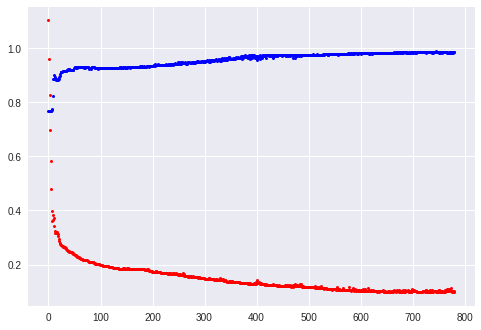

In [0]:
x_len = numpy.arange(len(y_acc))
plt.plot(x_len, y_vloss, "o", c="red", markersize=3)
plt.plot(x_len, y_acc, "o", c="blue", markersize=3)

plt.show()